<a href="https://colab.research.google.com/github/VishnuReddy25/DataStructure/blob/main/MLSEM5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import sklearn
import pandas as pd
import numpy
from sklearn.preprocessing import StandardScaler

In [2]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Experiment 1.1 FS**

In [4]:
import sklearn
import pandas as pd
import numpy
from sklearn.preprocessing import StandardScaler
df=pd.read_csv("/content/Qinspection.csv")
print("Dataframe \n\n",df.head())
print("---------------------------------------------------------------------------------------------")
#df.info()
print("dataframe columns \n\n",df.columns,"\n")
print("---------------------------------------------------------------------------------------------")
predictor_features=df.iloc[:,0:6]
print("Predicted _Features \n\n",predictor_features.head(),"\n")
print("---------------------------------------------------------------------------------------------")
class_variable=df.iloc[:,-1]
print("Class Variable \n\n",class_variable.head(),"\n")
print("---------------------------------------------------------------------------------------------")
std_predictor_features=StandardScaler().fit_transform(predictor_features)
new_df=pd.DataFrame(std_predictor_features,columns=predictor_features.columns)
print("Data Frame After Standardisation \n\n",new_df.head())
print("---------------------------------------------------------------------------------------------")
abs_cor_matrix=new_df.corr().abs()
print("Absolute Correlation Matrix \n\n",abs_cor_matrix)
print("---------------------------------------------------------------------------------------------")
upper_cor_matrix=abs_cor_matrix.where(numpy.triu(numpy.ones(abs_cor_matrix.shape),k=1).astype(bool))
print("Upper Correlation Matrix \n\n",upper_cor_matrix)
print("---------------------------------------------------------------------------------------------")
to_drop=[column for column in upper_cor_matrix.columns if any(upper_cor_matrix[column]>0.95)]
print("Columns to be dropped based on correlation are :\n\n",to_drop)
print("---------------------------------------------------------------------------------------------")
new_df1=new_df.drop(new_df[to_drop],axis=1)
print("Data Frame After Dropping Columns \n\n",new_df1.head())
print("---------------------------------------------------------------------------------------------")
merged_df=pd.concat([new_df1,class_variable],axis=1)
print("Final Data Frame \n\n",merged_df.head())
print("---------------------------------------------------------------------------------------------")

Dataframe 

    feature1  feature2  feature3  feature4  feature5  feature6 class
0       4.9       4.7       3.2       1.3       0.2       0.3     A
1       4.8       4.6       3.1       1.5       0.2       0.3     A
2       5.2       5.0       3.6       1.4       0.2       0.3     A
3       5.6       5.4       3.9       1.7       0.4       0.5     A
4       4.8       4.6       3.4       1.4       0.3       0.4     A
---------------------------------------------------------------------------------------------
dataframe columns 

 Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'class'],
      dtype='object') 

---------------------------------------------------------------------------------------------
Predicted _Features 

    feature1  feature2  feature3  feature4  feature5  feature6
0       4.9       4.7       3.2       1.3       0.2       0.3
1       4.8       4.6       3.1       1.5       0.2       0.3
2       5.2       5.0       3.6       1.4

# **CELL BY CELL**

In [ ]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,class
0,4.9,4.7,3.2,1.3,0.2,0.3,A
1,4.8,4.6,3.1,1.5,0.2,0.3,A
2,5.2,5.0,3.6,1.4,0.2,0.3,A
3,5.6,5.4,3.9,1.7,0.4,0.5,A
4,4.8,4.6,3.4,1.4,0.3,0.4,A


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  144 non-null    float64
 1   feature2  144 non-null    float64
 2   feature3  144 non-null    float64
 3   feature4  144 non-null    float64
 4   feature5  144 non-null    float64
 5   feature6  144 non-null    float64
 6   class     144 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.0+ KB


In [ ]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,6.052083,5.852083,3.054861,3.764583,1.199306,1.299306
std,0.838161,0.838161,0.441996,1.769575,0.761623,0.761623
min,4.500000,4.300000,2.000000,1.000000,0.100000,0.200000
25%,5.300000,5.100000,2.800000,1.600000,0.300000,0.400000
50%,6.000000,5.800000,3.000000,4.350000,1.300000,1.400000
75%,6.600000,6.400000,3.300000,5.100000,1.800000,1.900000
max,8.100000,7.900000,4.400000,6.900000,2.500000,2.600000


In [ ]:
df.columns

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'class'],
      dtype='object')

In [ ]:
predictor_features=df.iloc[:,0:6]
predictor_features

,feature1,feature2,feature3,feature4,feature5,feature6
0,4.9,4.7,3.2,1.3,0.2,0.3
1,4.8,4.6,3.1,1.5,0.2,0.3
2,5.2,5.0,3.6,1.4,0.2,0.3
3,5.6,5.4,3.9,1.7,0.4,0.5
4,4.8,4.6,3.4,1.4,0.3,0.4
...,...,...,...,...,...,...
139,7.0,6.8,3.2,5.9,2.3,2.4
140,6.9,6.7,3.3,5.7,2.5,2.6
141,6.9,6.7,3.0,5.2,2.3,2.4
142,6.5,6.3,2.5,5.0,1.9,2.0


In [ ]:
class_variable=df.iloc[:,-1]
class_variable


,class
0,A
1,A
2,A
3,A
4,A
...,...
139,C
140,C
141,C
142,C


In [ ]:
std_predictor_features=StandardScaler().fit_transform(predictor_features)


array([[-1.37933547e+00, -1.37933547e+00,  3.29517350e-01,
        -1.39761599e+00, -1.31665361e+00, -1.31665361e+00],
       [-1.49906079e+00, -1.49906079e+00,  1.02481473e-01,
        -1.28419998e+00, -1.31665361e+00, -1.31665361e+00],
       [-1.02015951e+00, -1.02015951e+00,  1.23766086e+00,
        -1.34090799e+00, -1.31665361e+00, -1.31665361e+00],
       [-5.41258222e-01, -5.41258222e-01,  1.91876849e+00,
        -1.17078398e+00, -1.05313989e+00, -1.05313989e+00],
       [-1.49906079e+00, -1.49906079e+00,  7.83589106e-01,
        -1.34090799e+00, -1.18489675e+00, -1.18489675e+00],
       [-1.02015951e+00, -1.02015951e+00,  7.83589106e-01,
        -1.28419998e+00, -1.31665361e+00, -1.31665361e+00],
       [-1.73851143e+00, -1.73851143e+00, -3.51590283e-01,
        -1.34090799e+00, -1.31665361e+00, -1.31665361e+00],
       [-1.13988483e+00, -1.13988483e+00,  1.02481473e-01,
        -1.28419998e+00, -1.44841047e+00, -1.44841047e+00],
       [-5.41258222e-01, -5.41258222e-01,  1.464

In [ ]:
new_df=pd.DataFrame(std_predictor_features,columns=predictor_features.columns)
new_df.head()

,feature1,feature2,feature3,feature4,feature5,feature6
0,-1.379335,-1.379335,0.329517,-1.397616,-1.316654,-1.316654
1,-1.499061,-1.499061,0.102481,-1.284200,-1.316654,-1.316654
2,-1.020160,-1.020160,1.237661,-1.340908,-1.316654,-1.316654
3,-0.541258,-0.541258,1.918768,-1.170784,-1.053140,-1.053140
4,-1.499061,-1.499061,0.783589,-1.340908,-1.184897,-1.184897
...,...,...,...,...,...,...
139,1.134896,1.134896,0.329517,1.210952,1.450240,1.450240
140,1.015171,1.015171,0.556553,1.097536,1.713754,1.713754
141,1.015171,1.015171,-0.124554,0.813996,1.450240,1.450240
142,0.536270,0.536270,-1.259734,0.700580,0.923213,0.923213


In [ ]:
cor_matrix=new_df.corr()
print(cor_matrix)

          feature1  feature2  feature3  feature4  feature5  feature6
feature1  1.000000  1.000000 -0.116306  0.871991  0.819242  0.819242
feature2  1.000000  1.000000 -0.116306  0.871991  0.819242  0.819242
feature3 -0.116306 -0.116306  1.000000 -0.434256 -0.374636 -0.374636
feature4  0.871991  0.871991 -0.434256  1.000000  0.962737  0.962737
feature5  0.819242  0.819242 -0.374636  0.962737  1.000000  1.000000
feature6  0.819242  0.819242 -0.374636  0.962737  1.000000  1.000000


In [ ]:
abs_cor_matrix=new_df.corr().abs()
print(abs_cor_matrix)

          feature1  feature2  feature3  feature4  feature5  feature6
feature1  1.000000  1.000000  0.116306  0.871991  0.819242  0.819242
feature2  1.000000  1.000000  0.116306  0.871991  0.819242  0.819242
feature3  0.116306  0.116306  1.000000  0.434256  0.374636  0.374636
feature4  0.871991  0.871991  0.434256  1.000000  0.962737  0.962737
feature5  0.819242  0.819242  0.374636  0.962737  1.000000  1.000000
feature6  0.819242  0.819242  0.374636  0.962737  1.000000  1.000000


In [ ]:
upper_cor_matrix=abs_cor_matrix.where(numpy.triu(numpy.ones(abs_cor_matrix.shape),k=1).astype(bool))
print(upper_cor_matrix)

          feature1  feature2  feature3  feature4  feature5  feature6
feature1       NaN       1.0  0.116306  0.871991  0.819242  0.819242
feature2       NaN       NaN  0.116306  0.871991  0.819242  0.819242
feature3       NaN       NaN       NaN  0.434256  0.374636  0.374636
feature4       NaN       NaN       NaN       NaN  0.962737  0.962737
feature5       NaN       NaN       NaN       NaN       NaN  1.000000
feature6       NaN       NaN       NaN       NaN       NaN       NaN


In [ ]:
to_drop=[column for column in upper_cor_matrix.columns if any(upper_cor_matrix[column]>0.95)]
print(to_drop)

['feature2', 'feature5', 'feature6']


In [ ]:
new_df1=new_df.drop(new_df[to_drop],axis=1)
new_df1

,feature1,feature3,feature4
0,-1.379335,0.329517,-1.397616
1,-1.499061,0.102481,-1.284200
2,-1.020160,1.237661,-1.340908
3,-0.541258,1.918768,-1.170784
4,-1.499061,0.783589,-1.340908
...,...,...,...
139,1.134896,0.329517,1.210952
140,1.015171,0.556553,1.097536
141,1.015171,-0.124554,0.813996
142,0.536270,-1.259734,0.700580


In [ ]:
merged_df=pd.concat([new_df1,class_variable],axis=1)
merged_df

,feature1,feature3,feature4,class
0,-1.379335,0.329517,-1.397616,A
1,-1.499061,0.102481,-1.284200,A
2,-1.020160,1.237661,-1.340908,A
3,-0.541258,1.918768,-1.170784,A
4,-1.499061,0.783589,-1.340908,A
...,...,...,...,...
139,1.134896,0.329517,1.210952,C
140,1.015171,0.556553,1.097536,C
141,1.015171,-0.124554,0.813996,C
142,0.536270,-1.259734,0.700580,C


# **EXPERIMENT -1.2 FS**

In [5]:
import sklearn
import pandas as pd
import numpy
from sklearn.feature_selection import mutual_info_classif
exp2df=pd.read_csv("/content/Qinspection.csv")
print("Dataframe \n",df.head())
print("---------------------------------------------------------------------------------------------")
predictors=exp2df.iloc[:,0:6]
target=exp2df.iloc[:,-1]
print("Predictors \n\n",predictors.head())
print("---------------------------------------------------------------------------------------------")
print("Target \n\n",target.head())
print("---------------------------------------------------------------------------------------------")
Mutual_information=mutual_info_classif(predictors,target)
print("Mutual Information \n\n",Mutual_information)
print("---------------------------------------------------------------------------------------------")
features=exp2df.columns
print("Features \n\n",features)
print("---------------------------------------------------------------------------------------------")
print("Features alongwith Mutual Information \n\n")
for feature in zip(features,Mutual_information):
  display(feature)
print("---------------------------------------------------------------------------------------------")
final_feturs=[]
for feature in zip(features,Mutual_information):
  if feature[1]>0.5:
    final_feturs.append(feature[0])
print("Final Features with threshold greater than 0.5 \n")
print(final_feturs)
print("---------------------------------------------------------------------------------------------")
finaldf=exp2df[final_feturs]
finaldf=pd.concat([finaldf,target],axis=1)
print("Final Data Frame \n\n",finaldf.head())
print("---------------------------------------------------------------------------------------------")

Dataframe 
    feature1  feature2  feature3  feature4  feature5  feature6 class
0       4.9       4.7       3.2       1.3       0.2       0.3     A
1       4.8       4.6       3.1       1.5       0.2       0.3     A
2       5.2       5.0       3.6       1.4       0.2       0.3     A
3       5.6       5.4       3.9       1.7       0.4       0.5     A
4       4.8       4.6       3.4       1.4       0.3       0.4     A
---------------------------------------------------------------------------------------------
Predictors 

    feature1  feature2  feature3  feature4  feature5  feature6
0       4.9       4.7       3.2       1.3       0.2       0.3
1       4.8       4.6       3.1       1.5       0.2       0.3
2       5.2       5.0       3.6       1.4       0.2       0.3
3       5.6       5.4       3.9       1.7       0.4       0.5
4       4.8       4.6       3.4       1.4       0.3       0.4
---------------------------------------------------------------------------------------------
Target

('feature1', 0.4851436271435907)

('feature2', 0.5262114595526519)

('feature3', 0.2512474944465979)

('feature4', 0.9889994390049817)

('feature5', 0.9798106820132253)

('feature6', 0.9860086297682467)

---------------------------------------------------------------------------------------------
Final Features with threshold greater than 0.5 

['feature2', 'feature4', 'feature5', 'feature6']
---------------------------------------------------------------------------------------------
Final Data Frame 

    feature2  feature4  feature5  feature6 class
0       4.7       1.3       0.2       0.3     A
1       4.6       1.5       0.2       0.3     A
2       5.0       1.4       0.2       0.3     A
3       5.4       1.7       0.4       0.5     A
4       4.6       1.4       0.3       0.4     A
---------------------------------------------------------------------------------------------


# **CELL BY CELL**

In [ ]:
exp2df=pd.read_csv("Qinspection.csv")

In [ ]:
exp2df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,class
0,4.9,4.7,3.2,1.3,0.2,0.3,A
1,4.8,4.6,3.1,1.5,0.2,0.3,A
2,5.2,5.0,3.6,1.4,0.2,0.3,A
3,5.6,5.4,3.9,1.7,0.4,0.5,A
4,4.8,4.6,3.4,1.4,0.3,0.4,A


In [ ]:
predictors=exp2df.iloc[:,0:6]
target=exp2df.iloc[:,-1]

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
Mutual_information=mutual_info_classif(predictors,target)

In [ ]:
Mutual_information

array([0.49315618, 0.50296187, 0.21909203, 0.98795666, 0.97194183,
       0.97912241])

In [ ]:
features=exp2df.columns
features


Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'class'],
      dtype='object')

In [ ]:
for feature in zip(features,Mutual_information):
    display(feature)

('feature1', 0.49315618107319925)

('feature2', 0.5029618686796038)

('feature3', 0.2190920330760453)

('feature4', 0.9879566591357569)

('feature5', 0.9719418267912678)

('feature6', 0.9791224137278853)

In [ ]:
final_feturs=[]
for feature in zip(features,Mutual_information):
  if feature[1]>0.5:
    final_feturs.append(feature[0])
print(final_feturs)

['feature2', 'feature4', 'feature5', 'feature6']


# **Experiment 1.3 using variance**

In [11]:
from typing import final
import sklearn
import pandas as pd
import numpy
from sklearn.feature_selection import VarianceThreshold
exp3df=pd.read_csv("/content/Qinspection.csv")
print("Dataframe \n",exp3df.head())
print("---------------------------------------------------------------------------------------------")
predictors=exp3df.iloc[:,0:6]
target=exp3df.iloc[:,-1]
print("Predictors \n\n",predictors.head())
print("---------------------------------------------------------------------------------------------")
print("Target \n\n",target.head())
print("---------------------------------------------------------------------------------------------")
features=exp3df.columns
print("Features \n\n",features)
print("---------------------------------------------------------------------------------------------")
selector = VarianceThreshold(threshold=.6)
selector.fit(predictors)
selector_predictor=selector.fit_transform(predictors)
print("Selector Predictor \n",selector_predictor[:5])
print("---------------------------------------------------------------------------------------------")
print("features along with their variance \n")
for s in zip(features,selector.variances_):
  display(s)

print("---------------------------------------------------------------------------------------------")
remaining_features = predictors.columns[selector.get_support()]
print("Features with Threshold 0.6 \n",remaining_features)
print("---------------------------------------------------------------------------------------------")
finaldf=exp3df[remaining_features]
finaldf=pd.concat([finaldf,target],axis=1)
print("Final Data Frame \n",finaldf.head())
print("---------------------------------------------------------------------------------------------")

Dataframe 
    feature1  feature2  feature3  feature4  feature5  feature6 class
0       4.9       4.7       3.2       1.3       0.2       0.3     A
1       4.8       4.6       3.1       1.5       0.2       0.3     A
2       5.2       5.0       3.6       1.4       0.2       0.3     A
3       5.6       5.4       3.9       1.7       0.4       0.5     A
4       4.8       4.6       3.4       1.4       0.3       0.4     A
---------------------------------------------------------------------------------------------
Predictors 

    feature1  feature2  feature3  feature4  feature5  feature6
0       4.9       4.7       3.2       1.3       0.2       0.3
1       4.8       4.6       3.1       1.5       0.2       0.3
2       5.2       5.0       3.6       1.4       0.2       0.3
3       5.6       5.4       3.9       1.7       0.4       0.5
4       4.8       4.6       3.4       1.4       0.3       0.4
---------------------------------------------------------------------------------------------
Target

('feature1', 0.6976345486111111)

('feature2', 0.6976345486111113)

('feature3', 0.19400414737654317)

('feature4', 3.1096484375)

('feature5', 0.5760411844135802)

('feature6', 0.5760411844135803)

---------------------------------------------------------------------------------------------
Features with Threshold 0.6 
 Index(['feature1', 'feature2', 'feature4'], dtype='object')
---------------------------------------------------------------------------------------------
Final Data Frame 
    feature1  feature2  feature4 class
0       4.9       4.7       1.3     A
1       4.8       4.6       1.5     A
2       5.2       5.0       1.4     A
3       5.6       5.4       1.7     A
4       4.8       4.6       1.4     A
---------------------------------------------------------------------------------------------


In [12]:
predictors=exp3df.iloc[:,0:6]
target=exp3df.iloc[:,-1]

In [13]:
selector=VarianceThreshold(threshold=0.6)
selector.fit(predictors)
# predictor_selector=selector.fit_transform(predictors)
print(selector.variances_)
for i in selector.variances_:
  if i>0.6:
    print(i)

[0.69763455 0.69763455 0.19400415 3.10964844 0.57604118 0.57604118]
0.6976345486111111
0.6976345486111113
3.1096484375


In [ ]:
selector = VarianceThreshold(threshold=.6)
selector.fit(predictors)

VarianceThreshold(threshold=0.6)

In [ ]:
selector_predictor=selector.fit_transform(predictors)

In [ ]:
selector_predictor[:5]

array([[4.9, 4.7, 1.3],
       [4.8, 4.6, 1.5],
       [5.2, 5. , 1.4],
       [5.6, 5.4, 1.7],
       [4.8, 4.6, 1.4]])

In [ ]:
for s in zip(features,selector.variances_):
  display(s)

('feature1', 0.6976345486111111)

('feature2', 0.6976345486111113)

('feature3', 0.19400414737654317)

('feature4', 3.1096484375)

('feature5', 0.5760411844135802)

('feature6', 0.5760411844135803)

In [ ]:
remaining_features = predictors.columns[selector.get_support()]
remaining_features

Index(['feature1', 'feature2', 'feature4'], dtype='object')

In [ ]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


# **FS-CoE-Cardata.**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
import pandas as pd
import numpy as np
cardata= pd.read_csv("/content/auto-mpg (1).csv")
print("car data \n")
df=pd.DataFrame(cardata)
display(df.head(2))
print("------------------------------------------------------------------------------------------------------")
cardata['horsepower'] = pd.to_numeric(cardata['horsepower'], errors='coerce').fillna(0).astype(int)
carname= cardata.iloc[:, 8].values
labelencoder = LabelEncoder()
carname= labelencoder.fit_transform(carname)
predictors= cardata.iloc[:,1:8]
target=cardata.iloc[:,0].values
X=cardata.iloc[:,0:8]
X['car name'] = carname
X['mpg'] = target
df2=pd.DataFrame(X)
print("after label encoding \n")
display(X.head(2))
print("---------------------------------------------------------------------------------------------------")
Impfeatures = X.drop("mpg", axis=1).apply(lambda x: x.corr(X.mpg))
indices = np.argsort(Impfeatures)
columns=df2.columns
print("features along with their corelation\n",Impfeatures)
print("---------------------------------------------------------------------------------------------------")
print("LIST OF IMPORTANT FEATURES \n")
required_features=[]
for i in range(0, len(indices)):
    if np.abs(Impfeatures.iloc[i])>0.5:
        print(columns[i])
        required_features.append(columns[i])

print("---------------------------------------------------------------------------------------------------")
newdf=df2[required_features]
# newdf=pd.concat([newdf,target],axis=1)
print("final data frame \n")
display(newdf.head())

car data 



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


------------------------------------------------------------------------------------------------------
after label encoding 



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,49
1,15.0,8,350.0,165,3693,11.5,70,1,36


---------------------------------------------------------------------------------------------------
features along with their corelation
 cylinders      -0.775396
displacement   -0.804203
horsepower     -0.754276
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
car name        0.273936
dtype: float64
---------------------------------------------------------------------------------------------------
LIST OF IMPORTANT FEATURES 

mpg
cylinders
displacement
horsepower
acceleration
model year
---------------------------------------------------------------------------------------------------
final data frame 



,mpg,cylinders,displacement,horsepower,acceleration,model year
0,18.0,8,307.0,130,12.0,70
1,15.0,8,350.0,165,11.5,70
2,18.0,8,318.0,150,11.0,70
3,16.0,8,304.0,150,12.0,70
4,17.0,8,302.0,140,10.5,70


# **FS-Kbest-Chi2**

In [16]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
iris_dataset=pd.read_csv("/content/Iris.csv")
df=pd.DataFrame(iris_dataset)
print("iris dataset \n")
display(df.head())
print("-----------------------------------------------------------------------------------------")
features = iris_dataset.iloc[:,1:5]
target = iris_dataset.iloc[:,-1]
chi2_features = SelectKBest(chi2, k = 2)
kbest_features = chi2_features.fit_transform(features, target)

# Reduced features
print('Original feature number:', features.shape[1])
print('Reduced feature number:', kbest_features.shape[1])
print("-------------------------------------------------------------------------------------------")
print("scores for the features \n")
for i in range(len(chi2_features.scores_)):
  print('Feature %d: %f' % (i, chi2_features.scores_[i]))
print("-------------------------------------------------------------------------------------------")
print("selected features \n")
selectedfetures=chi2_features.get_feature_names_out()
print(selectedfetures)
print("-------------------------------------------------------------------------------------------")
newdf=iris_dataset[selectedfetures]
newdf=pd.concat([newdf,target],axis=1)
print("final data frame \n")
display(newdf.head())


iris dataset 



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


-----------------------------------------------------------------------------------------
Original feature number: 4
Reduced feature number: 2
-------------------------------------------------------------------------------------------
scores for the features 

Feature 0: 10.817821
Feature 1: 3.594499
Feature 2: 116.169847
Feature 3: 67.244828
-------------------------------------------------------------------------------------------
selected features 

['PetalLengthCm' 'PetalWidthCm']
-------------------------------------------------------------------------------------------
final data frame 



,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


SelectKBest(k=2, score_func=<function chi2 at 0x7fe860959000>)


# **ANOVA**

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
iris_dataset=pd.read_csv("/content/Iris.csv")
df=pd.DataFrame(iris_dataset)
print("iris dataset \n")
display(df.head())
print("-----------------------------------------------------------------------------------------")
features = iris_dataset.iloc[:,1:5]
target = iris_dataset.iloc[:,-1]
fs = SelectKBest(f_classif, k=2)
X_kbest_features =fs.fit_transform(features, target)
selectedfeatures=fs.get_feature_names_out()
selectedfeatures
newdf=df[selectedfeatures]
newdf=pd.concat([newdf,target],axis=1)
display(newdf.head())

iris dataset 



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


-----------------------------------------------------------------------------------------


,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


# **LDA-Iris Data**

In [24]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

iris = datasets.load_iris()
X = iris.data[:, :4]  # we only take the first 4 features.
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train,y_train)

X_test = lda.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print("Confusion Matrix \n")
cm = confusion_matrix(y_test, y_pred)
print(cm,"\n")

print('Accuracy = ' + str(accuracy_score(y_test, y_pred)))

Confusion Matrix 

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]] 

Accuracy = 1.0


In [21]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
iris = datasets.load_iris()
type(iris)
# Splitting the dataset into the Training set and Test set
X = iris.data[:, :4]
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.decomposition import PCA
pca4 = PCA()
X_train = pca4.fit_transform(X_train)
X_test = pca4.transform(X_test)

#Variance preserved by each PC
explained_variance = pca4.explained_variance_ratio_
print('explained variance=',explained_variance)
print('----------------------------------------')
from sklearn.ensemble import RandomForestClassifier
#Training and Making Predictions
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Performance Evaluation
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('----------------------------\n')
print('Accuracy=' + str(accuracy_score(y_test, y_pred)))

explained variance= [0.72229951 0.2397406  0.03335483 0.00460506]
----------------------------------------
[[11  0  0]
 [ 0 11  2]
 [ 0  1  5]]
----------------------------

Accuracy=0.9


# **Regression**

Dataframe 



,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


---------------------------------------------------------------------------------------------------
Average time taken 

97.21428571428571
---------------------------------------------------------------------------------------------------
Performing Linear Regression 

Intercept:  4.161654135338296
Coefficinets:  [15.50877193]
---------------------------------------------------------------------------------------------------
adding predicted values to dataframe 



,Units,Minutes,predicted
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742


---------------------------------------------------------------------------------------------------
adding error column to dataframe 



,Units,Minutes,predicted,error
0,1,23,19.670426,-3.329574
1,2,29,35.179198,6.179198
2,3,49,50.687970,1.687970
3,4,64,66.196742,2.196742
4,4,74,66.196742,-7.803258


---------------------------------------------------------------------------------------------------
root mean squared error  

4.991767300317866


Text(7, 140, 'bestfit')

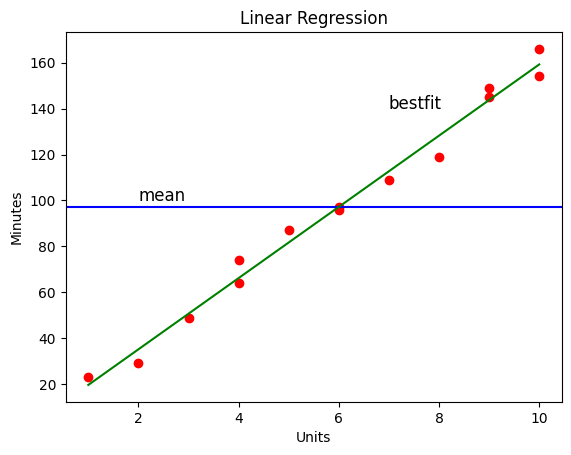

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
df=pd.read_csv("/content/computers.csv")
df=pd.DataFrame(df)
print("Dataframe \n")
display(df.head())
print("---------------------------------------------------------------------------------------------------")
print("Average time taken \n")
mean=df["Minutes"].mean()
print(mean)
print("---------------------------------------------------------------------------------------------------")
x=df["Units"] #predictor
y=df["Minutes"] #label
model=LinearRegression()
model.fit(x.values.reshape(-1,1),y)
print("Performing Linear Regression \n")
print("Intercept: ",model.intercept_)
print("Coefficinets: ",model.coef_)
print("---------------------------------------------------------------------------------------------------")
print("adding predicted values to dataframe \n")
c=model.intercept_
m=model.coef_
df["predicted"]=c+m*df["Units"]
display(df.head())
print("---------------------------------------------------------------------------------------------------")
print("adding error column to dataframe \n")
df["error"]=df["predicted"]-df["Minutes"]
display(df.head())
print("---------------------------------------------------------------------------------------------------")
print("root mean squared error  \n")
print((sum(df["error"]**2)/len(df))**0.5)

fig,ax=plt.subplots()
ax.scatter(df["Units"],df["Minutes"],color="red")
ax.axhline(y=mean,c="b")
ax.plot(df["Units"],df["predicted"],c="g")
ax.set_xlabel("Units")
ax.set_ylabel("Minutes")
ax.set_title("Linear Regression")
plt.text(2,100, "mean", fontsize=12)
plt.text(7,140, "bestfit", fontsize=12)

# **logistic regression**

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
data="/content/pima-indians-diabetes.csv"
columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df=pd.DataFrame(pd.read_csv(data,names=columns))
print("Dataframe \n")
display(df.head(2))
predictors=df.iloc[:,0:8]
target=df.iloc[:,-1]
print("Predictors \n")

display(predictors.head(2))
print("---------------------------------------------------------------------------------------------------")
print("Target \n")
display(target.head(2))
print("---------------------------------------------------------------------------------------------------")
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)
print("Scaled Predictors \n")
display(pd.DataFrame(predictors_scaled).head(2))
print("---------------------------------------------------------------------------------------------------")
X_train, X_test, y_train, y_test = train_test_split(predictors_scaled, target, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("model score \n")
model.score(X_test,y_test)
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
print(" The confusion matrix is=")
print(cm)
print("---------------------------------------------------------------------------------------------------")
print("The accuracy score is=")
print(accuracy_score(y_test, y_pred))
print("---------------------------------------------------------------------------------------------------")
print(" The confusion matrix is in the graphical form")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/pima-indians-diabetes.csv'

 The confusion matrix is=
[[120  31]
 [ 30  50]]
---------------------------------------------------------------------------------------------------
The accuracy score is=
0.7359307359307359
---------------------------------------------------------------------------------------------------
 The confusion matrix is in the graphical form


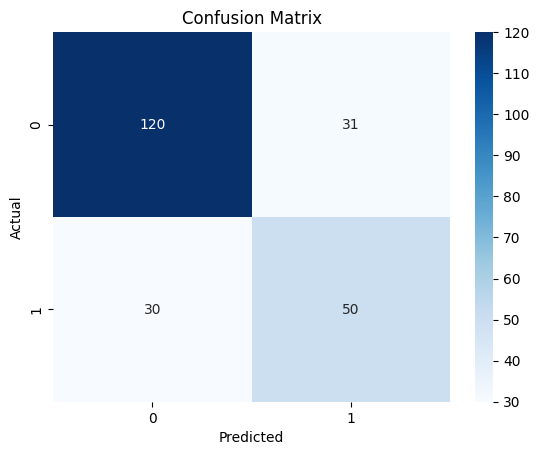

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
print(" The confusion matrix is=")
print(cm)
print("---------------------------------------------------------------------------------------------------")
print("The accuracy score is=")
print(accuracy_score(y_test, y_pred))
print("---------------------------------------------------------------------------------------------------")
print(" The confusion matrix is in the graphical form")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# prompt: find accuracy and prediction

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predictors and target variables defined as 'predictors' and 'target'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix (optional)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [144, 150]

# **naive base classifier**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv("/content/iris.csv")
df=pd.DataFrame(data)
print("Dataframe \n")
display(df.head())
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

print("Encoded Dataframe \n")
display(df)
print("---------------------------------------------------------------------------------------------------")
predictors=df.iloc[:,0:4]
target=df.iloc[:,-1]
print("Predictors \n")
display(predictors.head())
print("---------------------------------------------------------------------------------------------------")
print("Target \n")
display(target.head())

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("model score \n")
model.score(X_test,y_test)
print("---------------------------------------------------------------------------------------------------")
print("The accuracy score is :")
print(accuracy_score(y_test, y_pred))

Dataframe 



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Encoded Dataframe 



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


---------------------------------------------------------------------------------------------------
Predictors 



,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


---------------------------------------------------------------------------------------------------
Target 



,species
0,0
1,0
2,0
3,0
4,0


model score 

---------------------------------------------------------------------------------------------------
The accuracy score is :
1.0


In [ ]:

sepal_length = float(input("Enter sepal length: "))
sepal_width = float(input("Enter sepal width: "))
petal_length = float(input("Enter petal length: "))
petal_width = float(input("Enter petal width: "))

new_data = [[sepal_length, sepal_width, petal_length, petal_width]]


prediction = model.predict(new_data)

print("Predicted species:", prediction)


Enter sepal length: 3.2
Enter sepal width: 2.9
Enter petal length: 1.4
Enter petal width: 2
Predicted species: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# **Assignment**

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = np.array([[1, 1, 9],
                 [2, 4, 6],
                 [3, 7, 4],
                 [4, 11, 4],
                 [5, 9, 2]])


In [ ]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

In [ ]:
pca=PCA(n_components=2)
data_pca=pca.fit_transform(scaled_data)

In [ ]:
principal_components = pca.components_
print("Principal Components:")
print(principal_components)

print("\n Transformed data along the first two principal components: ")
print(data_pca)

Principal Components:
[[-0.58508358 -0.56897582  0.57787863]
 [-0.22234285  0.79781382  0.56040768]]

 Transformed data along the first two principal components: 
[[ 2.66842586  0.04992773]
 [ 1.04200355 -0.1445308 ]
 [-0.34022047 -0.10217387]
 [-1.39408485  0.63821667]
 [-1.97612409 -0.44143974]]


In [ ]:
# prompt: how to use label encoders

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample data with a categorical feature
data = {'color': ['red', 'green', 'blue', 'red', 'green']}
df = pd.DataFrame(data)

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'color' column
df['color_encoded'] = label_encoder.fit_transform(df['color'])

print(df)
